In [124]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
tf.config.list_physical_devices()
import matplotlib.pyplot as plt
import pandas as pd

2.9.1


### intro to regression in tensorflow

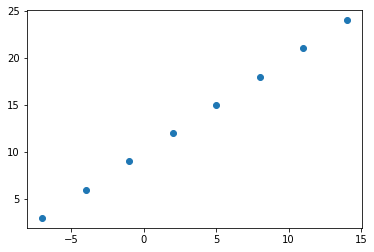

In [2]:
# build features

x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x,y) # here y = x + 10

In [3]:
# build tensor for demo housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
#turn np array to tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### steps in modeling in tf
1. create a model - define input and output layers, as well as hiden layers of a model
2. compiliong the model - define the loss funtions (how wrong the model is), optimizers (how to impove the model). evaluation metrics (what we can use to interpret performance of the model)
3. fitting the model - letting the model try to find paters between X and Y

In [5]:
# set random seed
tf.random.set_seed(42)

# 1. create the mode; using sequental API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# can also be done like this
# model = tf.keras.Sequential()
# model.app(tf.keras.layers.Dense(1))

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [6]:
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
model.predict([17.0])

1/1 [==============================] - 0s 202ms/step


array([[12.716021]], dtype=float32)

In [10]:
# add epochs to imporve the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5173 - mae: 9.5173
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3848 - mae: 9.3848
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 9.2523 - mae: 9.2523
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1198 - mae: 9.1198
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 8.9873 - mae: 8.9873
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8548 - mae: 8.8548
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7223 - mae: 8.7223
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5898 - mae: 8.5898
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4573 - mae: 8.4573
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3248 - mae: 8.3248
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1923 

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 40ms/step


array([[30.271011]], dtype=float32)

### steps to improve a DL model

1. **creating a model** - add more layers, increase hidden units in hidden layers
2. **compiling a model** - change optimization, change learning rate. 
3. **fitting a model** - increase epochs on the model, improve data for the model

In [15]:
# 1. create the mode; using sequental API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])
# can also be done like this
# model = tf.keras.Sequential()
# model.app(tf.keras.layers.Dense(1))

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 278ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.4800 - mae: 13.4800
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.9217 - mae: 12.9217
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.3612 - mae: 12.3612
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7937 - mae: 11.7937
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2106 - mae: 11.2106
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6209 - mae: 10.6209
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0058 - mae: 10.0058
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.3625 - mae: 9.3625
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.6887 - mae: 8.6887
Epoch 11/100
1/1 [==============================] - 0s 4ms/st

In [16]:
model.predict([17.0])

1/1 [==============================] - 0s 97ms/step


array([[31.727648]], dtype=float32)

In [17]:
# 1. create the mode; using sequental API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
# can also be done like this
# model = tf.keras.Sequential()
# model.app(tf.keras.layers.Dense(1))

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 330ms/step - loss: 13.3252 - mae: 13.3252
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8093 - mae: 12.8093
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.2911 - mae: 12.2911
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.7680 - mae: 11.7680
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2372 - mae: 11.2372
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6959 - mae: 10.6959
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1416 - mae: 10.1416
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 9.5711 - mae: 9.5711
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3704 - mae: 8.3704
Epoch 11/100
1/1 [==============================] - 0s 4ms/step

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[27.75227]], dtype=float32)

In [19]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=.0001),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100


C:\Users\Anthony\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 569ms/step - loss: 4.9712 - mae: 4.9712
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 4.9621 - mae: 4.9621
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 4.9531 - mae: 4.9531
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 4.9441 - mae: 4.9441
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 4.9350 - mae: 4.9350
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 4.9260 - mae: 4.9260
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 4.9169 - mae: 4.9169
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 4.9079 - mae: 4.9079
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 4.8988 - mae: 4.8988
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 4.8898 - mae: 4.8898
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 4.8808 - mae: 4.8

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 83ms/step


array([[28.949202]], dtype=float32)

### ML workflow

build -> fit -> evaluate -> tweak -> repeat

here we will be evaulating models and training NN on a larger data set

In [2]:
import matplotlib.pyplot as plt

In [3]:
x = tf.range(-100, 100, 4)
y = x + 10

In [4]:
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

<function matplotlib.pyplot.show(*args, **kw)>

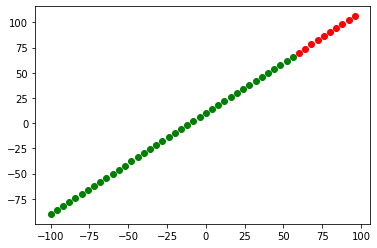

In [5]:
plt.figure()
plt.scatter(x_train, y_train, c='green', label='Training data')
plt.scatter(x_test, y_test, c='red', label='testing data')
plt.show

In [55]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [56]:
x_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>

In [57]:
# view the model after build
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* total params: total number of paramiters in the model
* trainable params: number of paramiters the model can update
* Non-trainable params: number of paramiters unable to be updated durring training (Needed for transfer learning)

In [58]:
pred = model.predict(x_test)

1/1 [==============================] - 0s 36ms/step


In [59]:
pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [60]:
# from tensorflow.keras.utils import plot_model
# plot_model(model=model)

In [104]:
def plot(pred):
    plt.figure()
    plt.scatter(x_train, y_train, c='blue', label='Training data')
    plt.scatter(x_test, y_test, c='green', label='testing data')
    plt.scatter(x_test, pred, c='red', label='testing data')
    plt.show

### evauating model

In [62]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 113ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [63]:
model.evaluate(pred, y_test)

1/1 [==============================] - 0s 87ms/step - loss: 18.3329 - mae: 18.3329


[18.332937240600586, 18.332937240600586]

In [67]:
# calcualte mse
tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [69]:
tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [91]:
# funtions for calc mas mse with tf
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

### build experiments to improve models

1. get more data
2. scale up DNN (layers or hidden units)
3. train for longer

In [105]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [106]:
y_pred = model.predict(x_test)
mae1 = mae(y_test, y_pred)
mse1 = mse(y_test, y_pred)
mae1, mse1

1/1 [==============================] - 0s 30ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

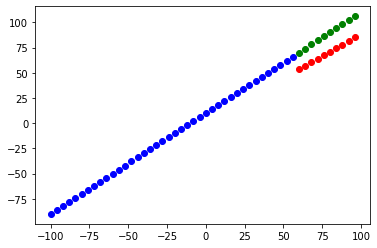

In [107]:
plot(y_pred)

In [108]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [109]:
y_pred = model.predict(x_test)
mae2 = mae(y_test, y_pred)
mse2 = mse(y_test, y_pred)
mae2, mse2

1/1 [==============================] - 0s 34ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=13.212741>,
 <tf.Tensor: shape=(), dtype=float32, numpy=184.5929>)

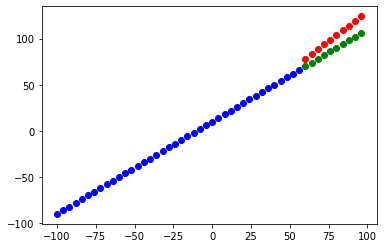

In [110]:
plot(y_pred)

In [111]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [112]:
y_pred = model.predict(x_test)
mae3 = mae(y_test, y_pred)
mse3 = mse(y_test, y_pred)
mae3, mse3

1/1 [==============================] - 0s 34ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

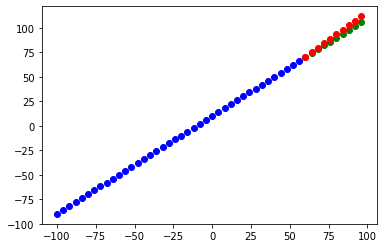

In [113]:
plot(y_pred)

In [130]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(10, name='hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [131]:
y_pred = model.predict(x_test)
mae4 = mae(y_test, y_pred)
mse4 = mse(y_test, y_pred)
mae4, mse4

1/1 [==============================] - 0s 38ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=75.65529>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5820.0015>)

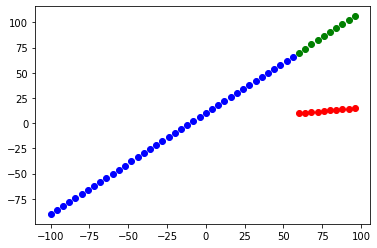

In [132]:
plot(y_pred)

In [133]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(10, name='hidden_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=10000, verbose=0)

In [134]:
y_pred = model.predict(x_test)
mae5 = mae(y_test, y_pred)
mse5 = mse(y_test, y_pred)
mae5, mse5

1/1 [==============================] - 0s 40ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=26.796442>,
 <tf.Tensor: shape=(), dtype=float32, numpy=731.6643>)

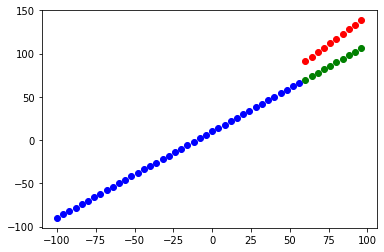

In [135]:
plot(y_pred)

In [136]:
pd.DataFrame([
    ['model_1', mae1.numpy(), mse1.numpy()],
    ['model_2', mae2.numpy(), mse2.numpy()],
    ['model_3', mae3.numpy(), mse3.numpy()],
    ['model_4', mae4.numpy(), mse4.numpy()],
    ['model_5', mae5.numpy(), mse5.numpy()]
], columns=['name', 'mae', 'mse'])

,name,mae,mse
0,model_1,18.745327,353.573395
1,model_2,13.212741,184.592896
2,model_3,3.196947,13.070175
3,model_4,75.655289,5820.001465
4,model_5,26.796442,731.664307


In [137]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3. fit the model
model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

### 2 ways to save a model

1. SavedModel
2. HDF5 format

In [139]:
model.save('./models/mock_regreshion')
model.save('./models/mock_regreshion.h5')

INFO:tensorflow:Assets written to: ./models/mock_regreshion\assets


In [140]:
loaded_model = tf.keras.models.load_model('./models/mock_regreshion')

In [145]:
y_pred = loaded_model.predict(x_test)

1/1 [==============================] - 0s 14ms/step


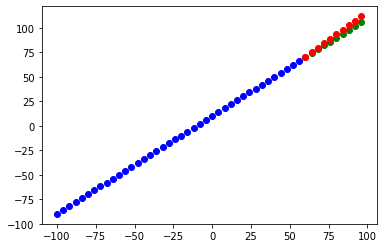

In [146]:
plot(y_pred)